In [31]:
import json
import pandas as pd


#Import Required Module
#!pip install tensorflow
#!pip install keras
#!pip install wordcloud
#!pip install libomp
#!pip install --upgrade libomp
#!pip3 install xgboost
#!pip install --upgrade xgboost #ran this command on terminal on mac OS 'conda install -c conda-forge xgboost'
#!pip install gensim
#!pip install pronouncing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re,string
import nltk 
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
stops = set(stopwords.words("english"))
punctuation = string.punctuation
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm,decomposition, ensemble
from sklearn.metrics import classification_report,roc_curve,confusion_matrix,auc
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from keras import layers, models, optimizers
from sklearn.decomposition import PCA,TruncatedSVD
import xgboost
import gensim
import warnings
warnings.filterwarnings('ignore')
import pronouncing




In [32]:
df_business = pd.read_json('yelp_training_set_business.json', lines=True)
print(df_business.head())

df_business.shape

              business_id                                       full_address  \
0  rncjoVoEFUJGCUoC1JgnUA         8466 W Peoria Ave\nSte 6\nPeoria, AZ 85345   
1  0FNFSzCFP_rGUoJx8W7tJg                  2149 W Wood Dr\nPhoenix, AZ 85029   
2  3f_lyB6vFK48ukH6ScvLHg              1134 N Central Ave\nPhoenix, AZ 85004   
3  usAsSV36QmUej8--yvN-dg              845 W Southern Ave\nPhoenix, AZ 85041   
4  PzOqRohWw7F7YEPBz6AubA  6520 W Happy Valley Rd\nSte 101\nGlendale Az, ...   

   open                                         categories         city  \
0  True  [Accountants, Professional Services, Tax Servi...       Peoria   
1  True                  [Sporting Goods, Bikes, Shopping]      Phoenix   
2  True                                                 []      Phoenix   
3  True                                    [Food, Grocery]      Phoenix   
4  True                 [Food, Bagels, Delis, Restaurants]  Glendale Az   

   review_count                          name neighborhoods   longit

(11537, 13)

In [33]:

import json
import pandas as pd

from ast import literal_eval


json_read = pd.read_json('yelp_training_set_review.json',  orient="records",lines=True, chunksize = 10000)


df_review = pd.concat(json_read)
print(df_review.head())
df_review.shape

df = pd.DataFrame(df_review['votes'].values.tolist(), index=df_review.index)
print (df)

                                  votes                 user_id  \
0  {'funny': 0, 'useful': 5, 'cool': 2}  rLtl8ZkDX5vH5nAx9C3q5Q   
1  {'funny': 0, 'useful': 0, 'cool': 0}  0a2KyEL0d3Yb1V6aivbIuQ   
2  {'funny': 0, 'useful': 1, 'cool': 0}  0hT2KtfLiobPvh6cDC8JQg   
3  {'funny': 0, 'useful': 2, 'cool': 1}  uZetl9T0NcROGOyFfughhg   
4  {'funny': 0, 'useful': 0, 'cool': 0}  vYmM4KTsC8ZfQBg-j5MWkw   

                review_id  stars       date  \
0  fWKvX83p0-ka4JS3dc6E5A      5 2011-01-26   
1  IjZ33sJrzXqU-0X6U8NwyA      5 2011-07-27   
2  IESLBzqUCLdSzSqm0eCSxQ      4 2012-06-14   
3  G-WvGaISbqqaMHlNnByodA      5 2010-05-27   
4  1uJFq2r5QfJG_6ExMRCaGw      5 2012-01-05   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  revi

In [34]:
df_user = pd.read_json('yelp_training_set_user.json', lines=True)
print(df_user.head())

df_user.shape


                                  votes                 user_id       name  \
0  {'funny': 0, 'useful': 7, 'cool': 0}  CR2y7yEm4X035ZMzrTtN9Q        Jim   
1  {'funny': 0, 'useful': 1, 'cool': 0}  _9GXoHhdxc30ujPaQwh6Ew      Kelle   
2  {'funny': 0, 'useful': 1, 'cool': 0}  8mM-nqxjg6pT04kwcjMbsw  Stephanie   
3  {'funny': 0, 'useful': 2, 'cool': 0}  Ch6CdTR2IVaVANr-RglMOg          T   
4  {'funny': 0, 'useful': 0, 'cool': 0}  NZrLmHRyiHmyT1JrfzkCOA       Beth   

   average_stars  review_count  type  
0            5.0             6  user  
1            1.0             2  user  
2            5.0             2  user  
3            5.0             2  user  
4            1.0             1  user  


(43873, 6)

In [35]:
df_checkin = pd.read_json('yelp_training_set_checkin.json', lines=True)
print(df_checkin.head())




                                        checkin_info     type  \
0  {'11-3': 17, '8-5': 1, '15-0': 2, '15-3': 2, '...  checkin   
1  {'0-5': 1, '2-6': 2, '2-5': 3, '3-6': 1, '3-5'...  checkin   
2  {'13-4': 1, '7-4': 1, '15-3': 1, '18-5': 1, '2...  checkin   
3  {'13-5': 1, '17-6': 1, '15-1': 1, '20-0': 1, '...  checkin   
4  {'16-2': 1, '14-5': 1, '12-5': 2, '15-4': 1, '...  checkin   

              business_id  
0  KO9CpaSPOoqm0iCWm5scmg  
1  oRqBAYtcBYZHXA7G8FlPaA  
2  6cy2C9aBXUwkrh4bY1DApw  
3  D0IB17N66FiyYDCzTlAI4A  
4  HLQGo3EaYVvAv22bONGkIw  


In [36]:
df_merge1=df_review.merge(df_business,how='left', on='business_id')

df_merge1.head()


,votes,user_id,review_id,stars_x,date,text,type_x,business_id,full_address,open,categories,city,review_count,name,neighborhoods,longitude,state,stars_y,latitude,type_y
0,"{'funny': 0, 'useful': 5, 'cool': 2}",rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg,"6106 S 32nd St\nPhoenix, AZ 85042",True,"[Breakfast & Brunch, Restaurants]",Phoenix,116,Morning Glory Cafe,[],-112.012504,AZ,4.0,33.390792,business
1,"{'funny': 0, 'useful': 0, 'cool': 0}",0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow,"4848 E Chandler Blvd\nPhoenix, AZ 85044",True,"[Italian, Pizza, Restaurants]",Phoenix,102,Spinato's Pizzeria,[],-111.978758,AZ,4.0,33.305607,business
2,"{'funny': 0, 'useful': 1, 'cool': 0}",0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA,"1513 E Apache Blvd\nTempe, AZ 85281",True,"[Middle Eastern, Restaurants]",Tempe,265,Haji-Baba,[],-111.913031,AZ,4.5,33.414345,business
3,"{'funny': 0, 'useful': 2, 'cool': 1}",uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg,"5401 N Hayden Rd\nScottsdale, AZ 85250",True,"[Active Life, Dog Parks, Parks]",Scottsdale,88,Chaparral Dog Park,[],-111.907886,AZ,4.5,33.522945,business
4,"{'funny': 0, 'useful': 0, 'cool': 0}",vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw,"1357 S Power Road\nMesa, AZ 85206",True,"[Tires, Automotive]",Mesa,5,Discount Tire,[],-111.684482,AZ,4.5,33.391027,business


In [37]:
df_merge2=df_merge1.merge(df_checkin,how='left', on='business_id')
df_merge2.head()

,votes,user_id,review_id,stars_x,date,text,type_x,business_id,full_address,open,...,review_count,name,neighborhoods,longitude,state,stars_y,latitude,type_y,checkin_info,type
0,"{'funny': 0, 'useful': 5, 'cool': 2}",rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg,"6106 S 32nd St\nPhoenix, AZ 85042",True,...,116,Morning Glory Cafe,[],-112.012504,AZ,4.0,33.390792,business,"{'10-5': 10, '12-5': 2, '14-6': 1, '11-5': 14,...",checkin
1,"{'funny': 0, 'useful': 0, 'cool': 0}",0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow,"4848 E Chandler Blvd\nPhoenix, AZ 85044",True,...,102,Spinato's Pizzeria,[],-111.978758,AZ,4.0,33.305607,business,"{'22-4': 1, '22-0': 1, '19-5': 12, '19-4': 19,...",checkin
2,"{'funny': 0, 'useful': 1, 'cool': 0}",0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA,"1513 E Apache Blvd\nTempe, AZ 85281",True,...,265,Haji-Baba,[],-111.913031,AZ,4.5,33.414345,business,"{'8-3': 1, '11-3': 4, '13-4': 5, '9-3': 1, '17...",checkin
3,"{'funny': 0, 'useful': 2, 'cool': 1}",uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg,"5401 N Hayden Rd\nScottsdale, AZ 85250",True,...,88,Chaparral Dog Park,[],-111.907886,AZ,4.5,33.522945,business,"{'22-4': 1, '22-0': 1, '19-5': 3, '19-4': 6, '...",checkin
4,"{'funny': 0, 'useful': 0, 'cool': 0}",vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw,"1357 S Power Road\nMesa, AZ 85206",True,...,5,Discount Tire,[],-111.684482,AZ,4.5,33.391027,business,"{'9-5': 1, '7-0': 2, '16-3': 2, '16-1': 1, '11...",checkin


In [38]:
df_merge4=df_merge2.merge(df_user,how='left', on='user_id')
df_merge4.head()


,votes_x,user_id,review_id,stars_x,date,text,type_x,business_id,full_address,open,...,stars_y,latitude,type_y,checkin_info,type_x,votes_y,name_y,average_stars,review_count_y,type_y
0,"{'funny': 0, 'useful': 5, 'cool': 2}",rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg,"6106 S 32nd St\nPhoenix, AZ 85042",True,...,4.0,33.390792,business,"{'10-5': 10, '12-5': 2, '14-6': 1, '11-5': 14,...",checkin,"{'funny': 331, 'useful': 1034, 'cool': 322}",Jason,3.72,376.0,user
1,"{'funny': 0, 'useful': 0, 'cool': 0}",0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow,"4848 E Chandler Blvd\nPhoenix, AZ 85044",True,...,4.0,33.305607,business,"{'22-4': 1, '22-0': 1, '19-5': 12, '19-4': 19,...",checkin,"{'funny': 2, 'useful': 0, 'cool': 0}",Paul,5.00,2.0,user
2,"{'funny': 0, 'useful': 1, 'cool': 0}",0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA,"1513 E Apache Blvd\nTempe, AZ 85281",True,...,4.5,33.414345,business,"{'8-3': 1, '11-3': 4, '13-4': 5, '9-3': 1, '17...",checkin,"{'funny': 0, 'useful': 3, 'cool': 0}",Nicole,4.33,3.0,user
3,"{'funny': 0, 'useful': 2, 'cool': 1}",uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg,"5401 N Hayden Rd\nScottsdale, AZ 85250",True,...,4.5,33.522945,business,"{'22-4': 1, '22-0': 1, '19-5': 3, '19-4': 6, '...",checkin,"{'funny': 18, 'useful': 75, 'cool': 36}",lindsey,4.29,31.0,user
4,"{'funny': 0, 'useful': 0, 'cool': 0}",vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw,"1357 S Power Road\nMesa, AZ 85206",True,...,4.5,33.391027,business,"{'9-5': 1, '7-0': 2, '16-3': 2, '16-1': 1, '11...",checkin,"{'funny': 3, 'useful': 32, 'cool': 8}",Roger,3.25,28.0,user


In [39]:

df_merge3=df_merge4.head(50000)
df_merge3.shape

(50000, 27)


Word cloud for 1 star rating restaurants



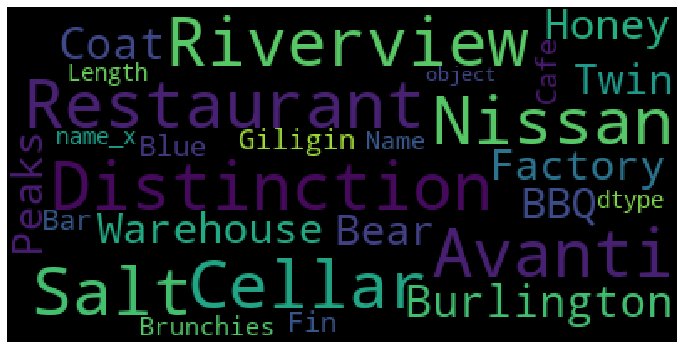


Word cloud for 2 star rating restaurants



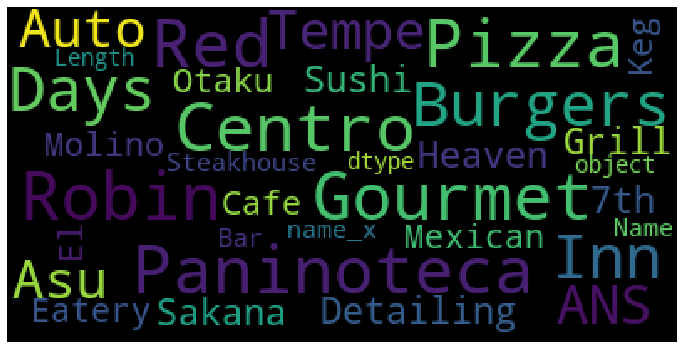


Word cloud for 3 star rating restaurants



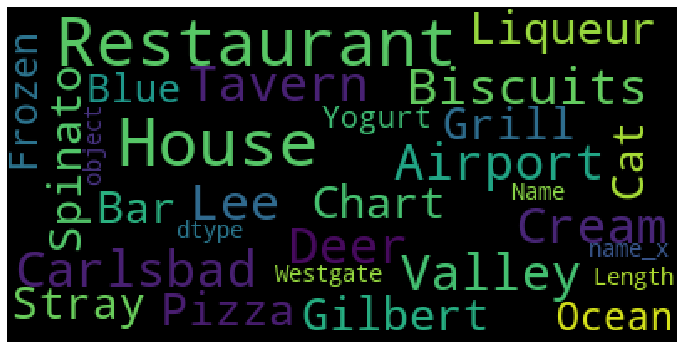


Word cloud for 4 star rating restaurants



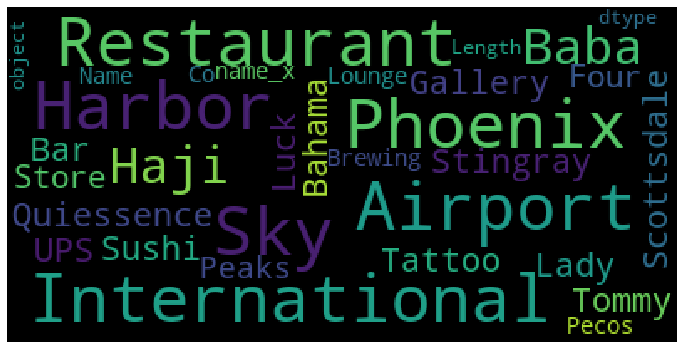


Word cloud for 5 star rating restaurants



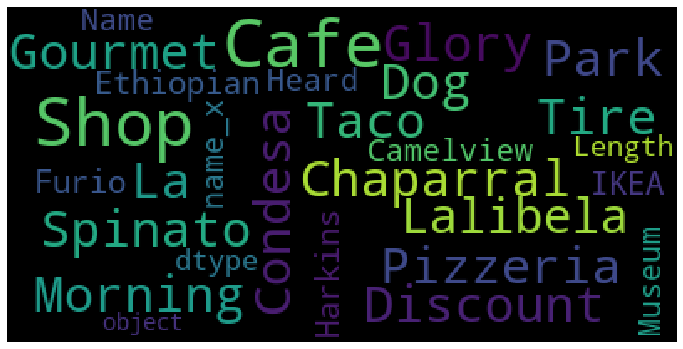

In [19]:
#Step6: Plot Word cloud for 1 star rating restaurants
print('\nWord cloud for 1 star rating restaurants\n')
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df_merge3[df_merge3['stars_x']==1]['name_x']))

fig = plt.figure(1,figsize=(12,18))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#Step6: Plot Word cloud for 2 star rating restaurants
print('\nWord cloud for 2 star rating restaurants\n')
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df_merge3[df_merge3['stars_x']==2]['name_x']))

fig = plt.figure(1,figsize=(12,18))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#Step6: Plot Word cloud for 3 star rating restaurants
print('\nWord cloud for 3 star rating restaurants\n')
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df_merge3[df_merge3['stars_x']==3]['name_x']))

fig = plt.figure(1,figsize=(12,18))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#Step6: Plot Word cloud for 4 star rating restaurants
print('\nWord cloud for 4 star rating restaurants\n')
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df_merge3[df_merge3['stars_x']==4]['name_x']))

fig = plt.figure(1,figsize=(12,18))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#Step6: Plot Word cloud for 5 star rating restaurants
print('\nWord cloud for 5 star rating restaurants\n')
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df_merge3[df_merge3['stars_x']==5]['name_x']))

fig = plt.figure(1,figsize=(12,18))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


Pie Chart:



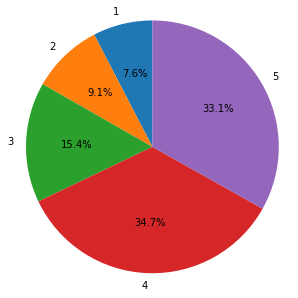

In [20]:

################################## VISUALIZATION #########################################

#Step4: Create a pie chart to show the percentage wise category distribution
print('\nPie Chart:\n')
labels = '1', '2', '3','4','5'
sizes = [17516, 20957, 35363,79878,76193]
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



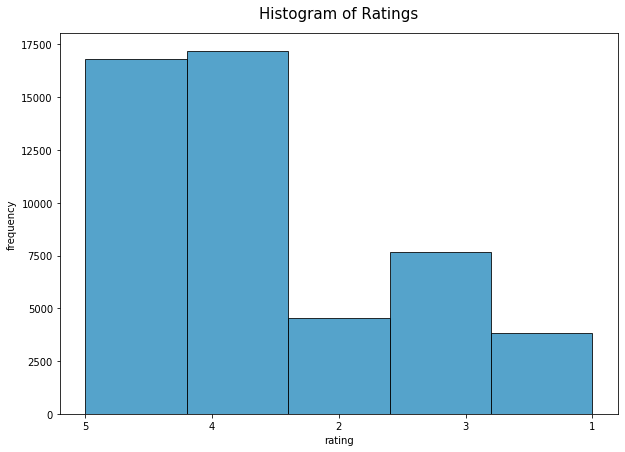

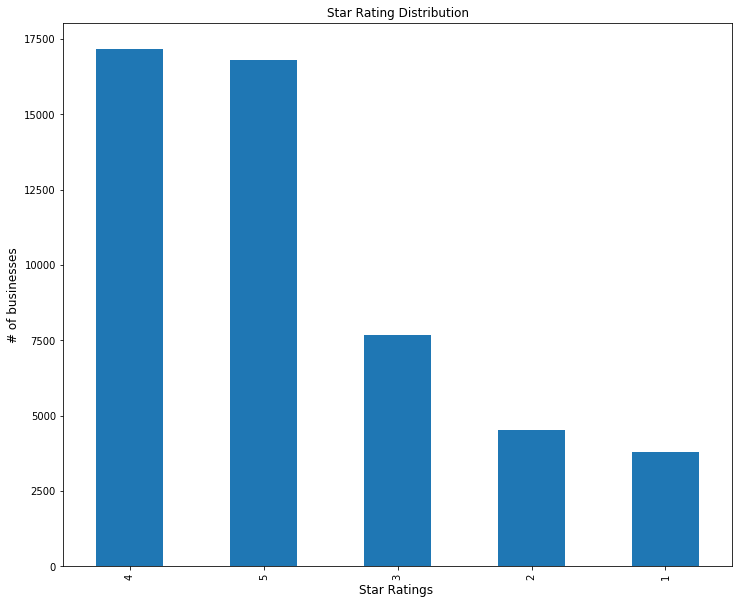


Pie Chart:



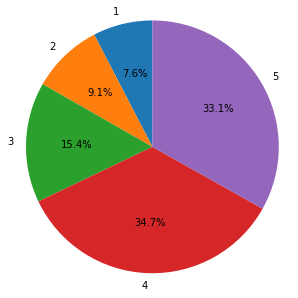

In [29]:

import matplotlib.pyplot as plt
num_bins = 5

fig, ax = plt.subplots(figsize = (10,7))

n, bins, patches = ax.hist(df_merge3['stars_x'], num_bins, facecolor='#2b8cbe', alpha=0.8, edgecolor='#000000', linewidth=1)

ax.set_title('Histogram of Ratings', fontsize = 15, pad=15)
ax.set_xlabel('rating')
ax.set_ylabel('frequency')

plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


x = df_merge3['stars_x']
y = df_merge3['stars_x'].value_counts(ascending=True)
fig, ax = plt.subplots(figsize=(12,10)  )  
width = 0.75 # the width of the bars 
df_merge3['stars_x'].value_counts().plot(kind='bar');
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)
plt.show()
  
#Step4: Create a pie chart to show the percentage wise rating distribution
print('\nPie Chart:\n')
labels = '1', '2', '3','4','5'
sizes = [17516, 20957, 35363,79878,76193]
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [40]:

# bin the data into negative, neutral, and positive values
bins = [0, 2, 4, 6]

bin_names = ['negative', 'neutral', 'positive']

score_bin = pd.Series(df_merge3.stars_x, name = 'score')

score = pd.cut(score_bin, bins, labels=bin_names, right=False)

# number of counts per score

pd.value_counts(score)

df_merge3 = pd.concat([df_merge3, score], axis=1)

df_merge3.head(2)



,votes_x,user_id,review_id,stars_x,date,text,type_x,business_id,full_address,open,...,latitude,type_y,checkin_info,type_x,votes_y,name_y,average_stars,review_count_y,type_y,score
0,"{'funny': 0, 'useful': 5, 'cool': 2}",rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg,"6106 S 32nd St\nPhoenix, AZ 85042",True,...,33.390792,business,"{'10-5': 10, '12-5': 2, '14-6': 1, '11-5': 14,...",checkin,"{'funny': 331, 'useful': 1034, 'cool': 322}",Jason,3.72,376.0,user,positive
1,"{'funny': 0, 'useful': 0, 'cool': 0}",0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow,"4848 E Chandler Blvd\nPhoenix, AZ 85044",True,...,33.305607,business,"{'22-4': 1, '22-0': 1, '19-5': 12, '19-4': 19,...",checkin,"{'funny': 2, 'useful': 0, 'cool': 0}",Paul,5.00,2.0,user,positive


In [41]:

# number of counts per score


top_restaurants=df_merge3[(df_merge3['stars_x']==5 ) ]

# top 10 restaurants with most reviews
#top_restaurants_10= top_restaurants.head(10)
top_restaurants=top_restaurants.drop_duplicates(subset=['latitude','longitude','name_x','review_count_x'])
top_restaurants_10 = top_restaurants.sort_values(['review_count_x'], ascending=[0]).head(20)
print(top_restaurants_10.head())
#!pip install folium pandas
import folium
#!pip install --upgrade pandas


top_restaurants_10=top_restaurants_10[['latitude','longitude','name_x','review_count_x']]  

#top_restaurants_10 = top_restaurants_10.sort_values(['review_count'], ascending=[0]).head(20)



center = [33.581867	, -112.241596]
map_USA = folium.Map(location=center, zoom_start=8)
for index, top_restaurants_10 in top_restaurants_10.iterrows():
    location = [top_restaurants_10['latitude'], top_restaurants_10['longitude']]
    folium.Marker(location, popup = f'Latitude:{top_restaurants_10["latitude"]}\n Top rated restaurant name:{top_restaurants_10["name_x"]}').add_to(map_USA)


map_USA


                                   votes_x                 user_id  \
2493  {'funny': 1, 'useful': 2, 'cool': 1}  -vRFUY8ixuNniCCNVvmkRQ   
205   {'funny': 3, 'useful': 2, 'cool': 2}  qklF6QU-bi4Y4Bt4g6Sv8A   
1321  {'funny': 0, 'useful': 0, 'cool': 0}  TL46g36OKxmgSDYRFJdPRg   
1791  {'funny': 0, 'useful': 2, 'cool': 2}  8-2W5CmkDl9vrkxRpkiPRg   
600   {'funny': 2, 'useful': 3, 'cool': 3}  5RxpP2Woo7CpOGUmKgDyAw   

                   review_id  stars_x       date  \
2493  7VsG6-m3wNhuoMUeHQ8Vcw        5 2012-06-03   
205   h2c-jLW9cLVIiiubGqTaog        5 2011-01-25   
1321  XdAtb3hIzydAmzdFy0Ubyw        5 2010-08-05   
1791  3eJ2M94guIOhVWexTM6iEw        5 2010-10-31   
600   R3Dndbcc0jEAlXyr4JV1EA        5 2008-05-08   

                                                   text  type_x  \
2493  It's called America's friendliest airport for ...  review   
205   On one of my many visits to see mi amore, he t...  review   
1321   Still solid, still delicious. I love this place!  review  

In [45]:

# number of counts per score

top_rated_restaurants = pd.Series(df_merge3['name_x'])
top_restaurants_counts = pd.value_counts(top_rated_restaurants)

# top 10 restaurants with most reviews
top_restaurants_counts.head(10)


Pita Jungle                                 273
Oregano's Pizza Bistro                      199
Cornish Pasty Company                       192
Phoenix Sky Harbor International Airport    186
Lo-Lo's Chicken & Waffles                   182
Pizzeria Bianco                             177
Four Peaks Brewing Co                       159
Matt's Big Breakfast                        158
Postino Arcadia                             144
Cibo                                        144
Name: name_x, dtype: int64

Training finished!
Vocab length: 9072
Vocab length: 9072


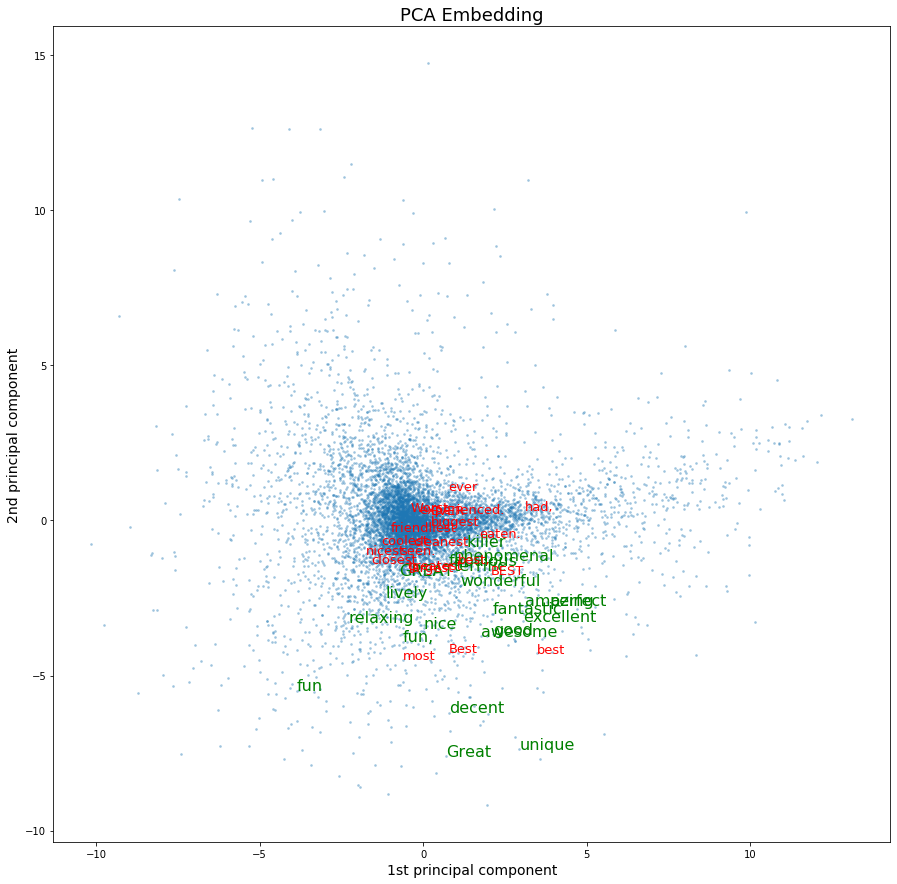

In [46]:
import matplotlib.pyplot as plt


df_merge3['text_cleaned'] = df_merge3['text'].apply(lambda x: x.split())
df_merge3.head()




from collections import defaultdict
word_freq = defaultdict(int)
for sent in df_merge3['text_cleaned']:
    for i in sent: 
        word_freq[i] += 1
len(word_freq)



sorted(word_freq, key=word_freq.get, reverse=True)[:10]


sentences = df_merge3['text_cleaned']
# Set values for various parameters
num_features = 100    # Word vector dimensionality                      
min_word_count = 40   # ignore all words with total frequency lower than this                       
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    


# Initialize and train the model (this will take some time)
from gensim.models import word2vec


model = word2vec.Word2Vec(sentences,
                          workers=num_workers,
                          size=num_features,
                          min_count=min_word_count,
                          window=context)

print("Training finished!")

# save the model for later use. You can load it later using Word2Vec.load()
model_name = "Word_Embedding"
model.save(model_name)



# Get vocabulary count of the model
vocab_tmp = list(model.wv.vocab)
print('Vocab length:',len(vocab_tmp))



from sklearn.metrics.pairwise import cosine_similarity

model.similarity('dish', 'plate')



model.most_similar(positive=['tasty', 'pleased','health','enjoy'], negative=['bad'],topn=20)


from gensim.models import Word2Vec
# Load the trained modelNumeric Representations of Words
model = Word2Vec.load("Word_Embedding")


vocab_tmp = list(model.wv.vocab)
print('Vocab length:',len(vocab_tmp))


# Get distributional representation of each word
X = model[vocab_tmp]


from sklearn import decomposition
# get two principle components of the feature space
pca = decomposition.PCA(n_components=2).fit_transform(X)


good_list = [x for x,y in model.most_similar('great',topn=20)]
bad_list = [x for x,y in model.most_similar('worst',topn=20)]
# good_list = [x for x,y in model.most_similar(positive=['good', 'great','health','sanitary'], negative=['bad'],topn=10)]


# set figure settings
plt.figure(figsize=(15,15))

# save pca values and vocab in dataframe df
df = pd.concat([pd.DataFrame(pca),pd.Series(vocab_tmp)],axis=1)
df.columns = ['x', 'y', 'word']

plt.xlabel("1st principal component", fontsize=14)
plt.ylabel('2nd principal component', fontsize=14)

plt.scatter(x=df['x'], y=df['y'],s=3,alpha=0.3)

good_words = df[df['word'].isin(good_list)]['word']
for i, word in good_words.items():
    plt.annotate(word, (df['x'].iloc[i], df['y'].iloc[i]),fontsize=16,color='green')
   
    
bad_words = df[df['word'].isin(bad_list)]['word']
for i, word in bad_words.items():
    plt.annotate(word, (df['x'].iloc[i], df['y'].iloc[i]),fontsize=13,color='red')


plt.title("PCA Embedding", fontsize=18)


plt.show()

In [48]:

###################################### FEATURE ENGINEERING ##############################################

# Step 9: NLP/Text based features such as char_count/word_count/punctuation_count
# extract features from text
df_merge3['char_count'] = df_merge3['text'].apply(len)
df_merge3['word_count'] = df_merge3['text'].apply(lambda x: len(x.split()))
df_merge3['word_density'] = df_merge3['char_count'] / (df_merge3['word_count']+1)
df_merge3['punctuation_count'] = df_merge3['text'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) 
df_merge3['title_word_count'] = df_merge3['text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
df_merge3['upper_case_word_count'] = df_merge3['text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))
df_merge3['stopword_count'] = df_merge3['text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.lower() in stops]))


df_merge3['line_count'] = df_merge3['text'].apply(lambda x: len([(line) for line in x.split('\r\n')]))
#print(df['line_count'])
print('\nPrint NLP/Text based features:\n')
print(df_merge3[['char_count', 'word_count', 'word_density', 'punctuation_count', 'title_word_count', 'upper_case_word_count', 'stopword_count','line_count']].head(10))





Print NLP/Text based features:

   char_count  word_count  word_density  punctuation_count  title_word_count  \
0         889         155      5.698718                 21                16   
1        1345         257      5.213178                 36                25   
2          76          16      4.470588                  3                 2   
3         419          76      5.441558                 18                13   
4         469          86      5.390805                 38                12   
5        2094         366      5.705722                 64                33   
6        1565         292      5.341297                 50                45   
7         274          50      5.372549                  9                 9   
8         349          62      5.539683                 13                 9   
9         186          34      5.314286                  4                 4   

   upper_case_word_count  stopword_count  line_count  
0                      3       

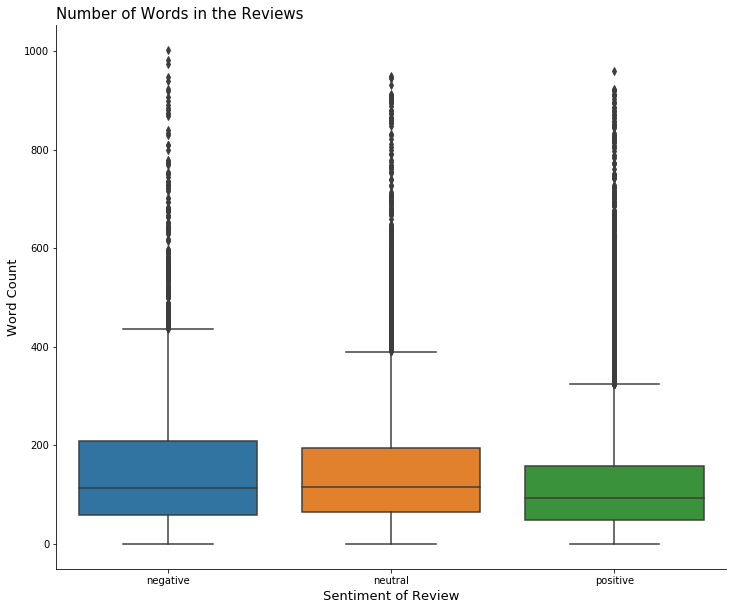

In [49]:



counts_df = df_merge3[['score', 'text','word_count']]

# separate by positive and negative reviews
counts_pos = counts_df.loc[(counts_df['score']=='positive')]

counts_neg = counts_df.loc[(counts_df['score']=='negative')]

# create figure
fig, ax = plt.subplots(figsize = (12,10))

sns.boxplot(x=counts_df['score'], y=counts_df['word_count'])

# title
ax.set_title('Number of Words in the Reviews', fontsize = 15, loc = 'left')

# set x axis label
ax.set_xlabel('Sentiment of Review', fontsize = 13)

# set y axis label
ax.set_ylabel('Word Count', fontsize = 13)

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.show()


In [51]:





#Step 12:  Clean text:  no punctuation/all lowercase/remove stop words




#Convert all cases to lower case
df_merge3 = df_merge3.astype(str).apply(lambda x: x.str.lower())
#print('\nFew sample records after converting strings to low case:\n')
#print(df.head())

#Remove the punctuations from the dataframe
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

df_merge3['text'] = df_merge3['text'].apply(remove_punctuations)
#print('\nFew sample records after removing punctuations:\n')
#print(df.head())


#Remove stop words from dataframe
df_merge3['text'] = df_merge3['text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stops]))
#print('\nFew sample records after removing stop words:\n')
#print(df.head())

#Apply porter_stemmer on dataframe
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

df_merge3['txt_tokenized']=df_merge3['text'].apply(lambda x : filter(None,x.split(" ")))
df_merge3['txt_stemmed']=df_merge3['txt_tokenized'].apply(lambda x : [porter_stemmer.stem(y) for y in x])
df_merge3['txt_stemmed_sentence']=df_merge3['txt_stemmed'].apply(lambda x : " ".join(x))
print('\nFew sample records after doing cleaning/preprocessing (convert to low case/remove punctuation/remove stopwords/apply porter stemmer:\n')
print(df_merge3.head())





Few sample records after doing cleaning/preprocessing (convert to low case/remove punctuation/remove stopwords/apply porter stemmer:

                                votes_x                 user_id  \
0  {'funny': 0, 'useful': 5, 'cool': 2}  rltl8zkdx5vh5nax9c3q5q   
1  {'funny': 0, 'useful': 0, 'cool': 0}  0a2kyel0d3yb1v6aivbiuq   
2  {'funny': 0, 'useful': 1, 'cool': 0}  0ht2ktfliobpvh6cdc8jqg   
3  {'funny': 0, 'useful': 2, 'cool': 1}  uzetl9t0ncrogoyffughhg   
4  {'funny': 0, 'useful': 0, 'cool': 0}  vymm4ktsc8zfqbg-j5mwkw   

                review_id stars_x        date  \
0  fwkvx83p0-ka4js3dc6e5a       5  2011-01-26   
1  ijz33sjrzxqu-0x6u8nwya       5  2011-07-27   
2  ieslbzqucldszsqm0ecsxq       4  2012-06-14   
3  g-wvgaisbqqamhlnnbyoda       5  2010-05-27   
4  1ujfq2r5qfjg_6exmrcagw       5  2012-01-05   

                                                text  type_x  \
0  wife took birthday breakfast excellent weather...  review   
1  idea people give bad reviews place g

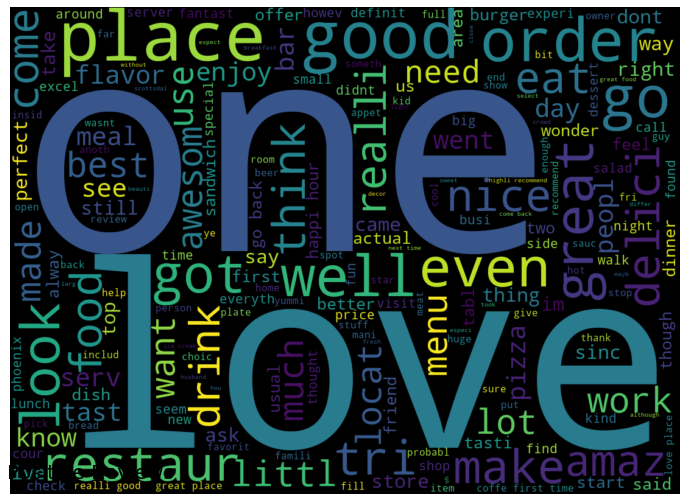

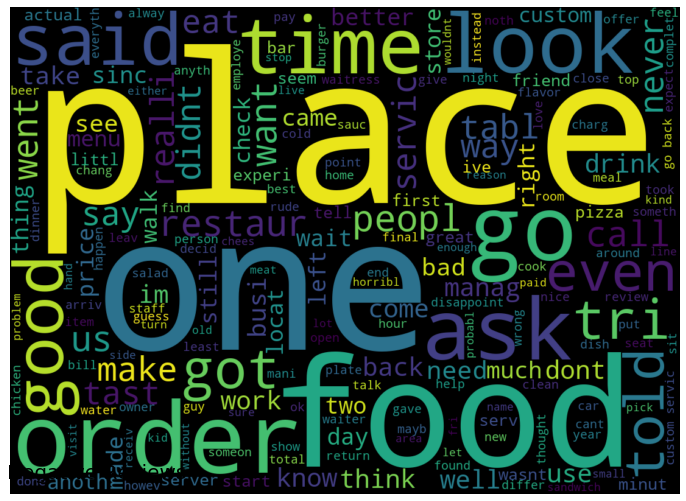

In [53]:


pos = df_merge3.loc[(df_merge3['score']=='positive')]
neg = df_merge3.loc[(df_merge3['score']=='negative')]

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
stopwords = set(STOPWORDS)
pos_text = " ".join(review for review in pos.txt_stemmed_sentence)

# create figure
fig, ax = plt.subplots(figsize = (12,10))

wordcloud = WordCloud(width=1100, height=800, stopwords=stopwords).generate(pos_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

ax.set_title('Positive Reviews', pad=15, fontsize = 20)
ax.title.set_position([.12, 0])


plt.show()


neg_text = " ".join(review for review in neg.txt_stemmed_sentence)

# create figure
fig, ax = plt.subplots(figsize = (12,10))

wordcloud = WordCloud(width=1100, height=800, stopwords=stopwords).generate(neg_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

ax.set_title('Negative Reviews', pad=15, fontsize = 20)
ax.title.set_position([.13, 0])


plt.show()

3349026
         word_count
place         36712
good          33369
food          30896
like          27648
great         25101
go            24018
get           23261
time          22616
one           21406
order         18553
realli        16821
servic        16142
would         15408
love          15145
tri           15031
back          14604
also          12522
dont          12408
even          11463
im            11438
nice          11425
make          11174
look          11051
littl         10887
restaur       10664


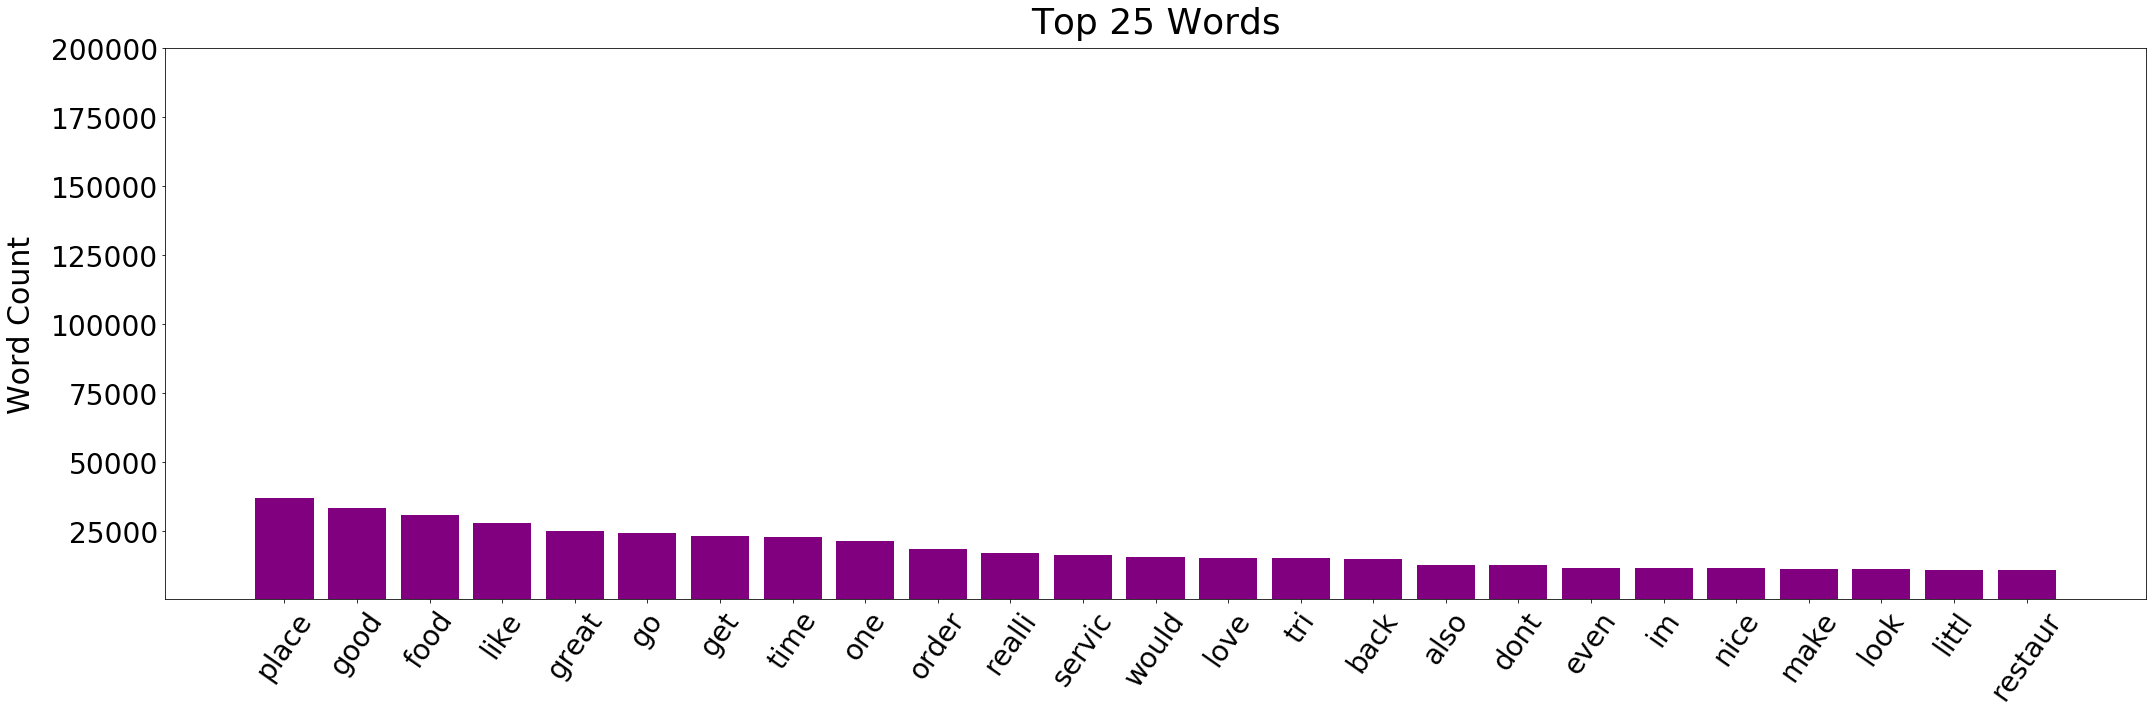

In [23]:

big_string_proc = ' '.join(df_merge3.txt_stemmed_sentence)
all_words_proc = big_string_proc.split()
print(len(all_words_proc))


# create dictionary of word counts
fdist = FreqDist(all_words_proc)

# convert word counts to dataframe
fdist_df = pd.DataFrame(data=fdist.values(),index=fdist.keys(), columns=['word_count'])
fdist_df = fdist_df.sort_values('word_count',ascending=False)
top_25 = fdist_df.iloc[:25,:]
print(top_25)


# create labels and prettify the plot
plt.figure(figsize=(30,10))
plt.title('Top 25 Words', fontsize=36, pad=15)
plt.ylabel('Word Count', fontsize=30, labelpad=15)
plt.xticks(rotation=55, fontsize=28)
plt.yticks(fontsize=28)
plt.ylim(bottom=100, top=200000)

# plot top 25 words
plt.bar(top_25.index, top_25.word_count, color='purple')

# prepare to save and display
plt.tight_layout()
plt.show()






In [17]:





from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer

# Check most important features in the dataset with chi2 score test

print('\nBelow are the most important features based on Chi2 score:\n')

Tfidf = TfidfVectorizer(min_df=5, ngram_range=(1, 2))
tfidf_features = Tfidf.fit_transform(df_merge3['txt_stemmed_sentence'])
tfidf_features.shape

N = 5
Number = 1
for rating in df_merge3['stars_x'].unique():
                features_chi2 = chi2(tfidf_features, df_merge3['stars_x'] == rating)
                indices = np.argsort(features_chi2[0])
                feature_names = np.array(Tfidf.get_feature_names())[indices]
                unigrams = [x for x in feature_names if len(x.split(' ')) == 1]
                bigrams = [x for x in feature_names if len(x.split(' ')) == 2]
                print("{}. {} :".format(Number,rating))
                print("\t Unigrams :\n\t. {}".format('\n\t. '.join(unigrams[-N:])))
                print("\t Bigrams :\n\t. {}".format('\n\t. '.join(bigrams[-N:])))
                Number += 1
                
print('\n')              



Below are the most important features based on Chi2 score:

1. 5 :
	 Unigrams :
	. highli
	. awesom
	. love
	. best
	. amaz
	 Bigrams :
	. great food
	. pretti good
	. love love
	. highli recommend
	. love place
2. 4 :
	 Unigrams :
	. ok
	. horribl
	. tasti
	. worst
	. good
	 Bigrams :
	. happi hour
	. realli enjoy
	. good food
	. realli good
	. four star
3. 2 :
	 Unigrams :
	. overpr
	. ok
	. meh
	. mediocr
	. bland
	 Bigrams :
	. experienc better
	. want like
	. noth special
	. wont back
	. two star
4. 3 :
	 Unigrams :
	. averag
	. pretti
	. aok
	. decent
	. ok
	 Bigrams :
	. noth special
	. 35 star
	. food ok
	. pretti good
	. three star
5. 1 :
	 Unigrams :
	. terribl
	. told
	. rude
	. horribl
	. worst
	 Bigrams :
	. place suck
	. food poison
	. zero star
	. wast time
	. never go




In [24]:


#df_merge3.drop('text',axis='columns', inplace=True)
print(list(df_merge3.columns))

df_merge3.drop('char_count',axis='columns', inplace=True)
df_merge3.drop('word_count',axis='columns', inplace=True)
df_merge3.drop('word_density',axis='columns', inplace=True)
df_merge3.drop('punctuation_count',axis='columns', inplace=True)
df_merge3.drop('title_word_count',axis='columns', inplace=True)
df_merge3.drop('upper_case_word_count',axis='columns', inplace=True)
df_merge3.drop('stopword_count',axis='columns', inplace=True)
df_merge3.drop('line_count',axis='columns', inplace=True)
df_merge3.drop('txt_tokenized',axis='columns', inplace=True)
df_merge3.drop('txt_stemmed',axis='columns', inplace=True)


['votes_x', 'user_id', 'review_id', 'stars_x', 'date', 'text', 'type_x', 'business_id', 'full_address', 'open', 'categories', 'city', 'review_count_x', 'name_x', 'neighborhoods', 'longitude', 'state', 'stars_y', 'latitude', 'type_y', 'checkin_info', 'type_x', 'votes_y', 'name_y', 'average_stars', 'review_count_y', 'type_y', 'char_count', 'word_count', 'word_density', 'punctuation_count', 'title_word_count', 'upper_case_word_count', 'stopword_count', 'line_count', 'txt_tokenized', 'txt_stemmed', 'txt_stemmed_sentence']


In [25]:
 ########################  MODEL BUILDING AND EVALUATIONS ###########################################          

# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df_merge3['txt_stemmed_sentence'], df_merge3['stars_x'])


# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

################### Create features from text #########################

# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(df_merge3['txt_stemmed_sentence'])

# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df_merge3['txt_stemmed_sentence'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(df_merge3['txt_stemmed_sentence'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(df_merge3['txt_stemmed_sentence'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)







In [23]:
######## Test with Truncated SVD technique to check the optimum number of components/features
# Dimensionality reduction


for num_components in range(100):
                    svd = TruncatedSVD(n_components=num_components, random_state=42)
                    X_svd = svd.fit_transform(xtrain_tfidf)
                    print(f"Total variance explained: {np.sum(svd.explained_variance_ratio_):.2f}", 'number of components:',num_components)

# Check explained variance ratio for 300 components/features
svd = TruncatedSVD(n_components=300, random_state=42)
X_svd = svd.fit_transform(xtrain_tfidf)
#print("\nTotal variance explained with 300 components: {np.sum(svd.explained_variance_ratio_):.2f}")
print(f"Total variance explained: {np.sum(svd.explained_variance_ratio_):.2f}", 'number of components:','300')


Total variance explained: 0.00 number of components: 0
Total variance explained: 0.00 number of components: 1
Total variance explained: 0.01 number of components: 2
Total variance explained: 0.02 number of components: 3
Total variance explained: 0.02 number of components: 4
Total variance explained: 0.02 number of components: 5
Total variance explained: 0.03 number of components: 6
Total variance explained: 0.03 number of components: 7
Total variance explained: 0.04 number of components: 8
Total variance explained: 0.04 number of components: 9
Total variance explained: 0.04 number of components: 10
Total variance explained: 0.05 number of components: 11
Total variance explained: 0.05 number of components: 12
Total variance explained: 0.05 number of components: 13
Total variance explained: 0.05 number of components: 14
Total variance explained: 0.06 number of components: 15
Total variance explained: 0.06 number of components: 16
Total variance explained: 0.06 number of components: 17
To

In [26]:
############################### Train, Build and Evaluate the model ####################################3
#Write a function to train the model classifier that will calculate the accuracy 
#The function will also plot the confusion matrix and will print the classification report

def train_model(model_name,classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    cf_matrix=confusion_matrix(valid_y, predictions)
    print('\nConfusion matrix for' ,model_name,'is:\n')
    print(confusion_matrix(valid_y, predictions))
    print('\nClassification report for',model_name,'is:\n')
    print(classification_report(valid_y, predictions,target_names=['1','2','3','4','5']))
    index = ['0','1','2','3','4']  
    columns = ['1','2','3','4','5']  
    cm_df = pd.DataFrame(cf_matrix,columns,index)                      
    plt.figure(figsize=(5.5,4))  
    sns.heatmap(cm_df, annot=True,cmap="viridis" ,fmt='g')
    plt.xticks([0,1,2,3,4])
    plt.yticks([0,1,2,3,4])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(model_name)
    plt.show()
    
    return metrics.accuracy_score(predictions, valid_y)





Confusion matrix for Naive Bayes  Count Vectors: is:

[[ 927  326  261  236  108]
 [ 360  382  792  687  145]
 [ 162  145  957 2170  339]
 [ 151   39  439 5877 2155]
 [ 185   20   69 3147 4921]]

Classification report for Naive Bayes  Count Vectors: is:

              precision    recall  f1-score   support

           1       0.52      0.50      0.51      1858
           2       0.42      0.16      0.23      2366
           3       0.38      0.25      0.30      3773
           4       0.49      0.68      0.57      8661
           5       0.64      0.59      0.61      8342

    accuracy                           0.52     25000
   macro avg       0.49      0.44      0.45     25000
weighted avg       0.52      0.52      0.51     25000



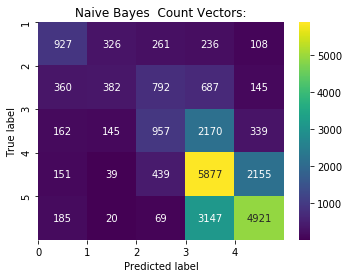

Accuracy of Naive Bayes, Count Vectors Model is:  52.26%

Confusion matrix for NB, WordLevel TF-IDF:  is:

[[ 810  152  108  590  198]
 [ 306  164  309 1369  218]
 [ 103   53  285 2918  414]
 [  69    5   54 6368 2165]
 [  75    1    7 3362 4897]]

Classification report for NB, WordLevel TF-IDF:  is:

              precision    recall  f1-score   support

           1       0.59      0.44      0.50      1858
           2       0.44      0.07      0.12      2366
           3       0.37      0.08      0.13      3773
           4       0.44      0.74      0.55      8661
           5       0.62      0.59      0.60      8342

    accuracy                           0.50     25000
   macro avg       0.49      0.38      0.38     25000
weighted avg       0.50      0.50      0.46     25000



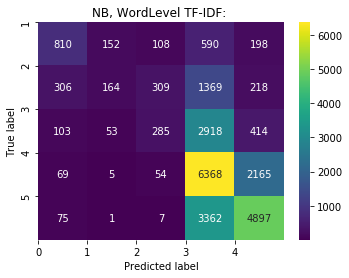

Accuracy of Naive Bayes, WordLevel TF-IDF Model is:  50.10%

Confusion matrix for NB, N-Gram Vectors:  is:

[[ 668  158  121  553  358]
 [ 286  354  414  994  318]
 [ 104  112  683 2385  489]
 [  61   25  223 5776 2576]
 [  62   17   25 3093 5145]]

Classification report for NB, N-Gram Vectors:  is:

              precision    recall  f1-score   support

           1       0.57      0.36      0.44      1858
           2       0.53      0.15      0.23      2366
           3       0.47      0.18      0.26      3773
           4       0.45      0.67      0.54      8661
           5       0.58      0.62      0.60      8342

    accuracy                           0.51     25000
   macro avg       0.52      0.39      0.41     25000
weighted avg       0.51      0.51      0.48     25000



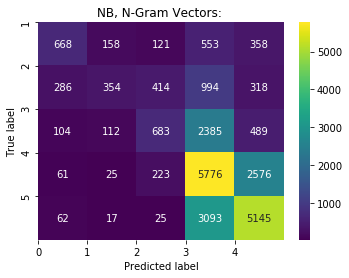

Accuracy of Naive Bayes, N-Gram Vectors Model is:  50.50%

Confusion matrix for NB, CharLevel Vectors:  is:

[[ 570   40   27  878  343]
 [ 214   72  122 1665  293]
 [  72   29  130 3095  447]
 [  52    1   27 6236 2345]
 [  50    0    4 3229 5059]]

Classification report for NB, CharLevel Vectors:  is:

              precision    recall  f1-score   support

           1       0.59      0.31      0.40      1858
           2       0.51      0.03      0.06      2366
           3       0.42      0.03      0.06      3773
           4       0.41      0.72      0.52      8661
           5       0.60      0.61      0.60      8342

    accuracy                           0.48     25000
   macro avg       0.51      0.34      0.33     25000
weighted avg       0.50      0.48      0.43     25000



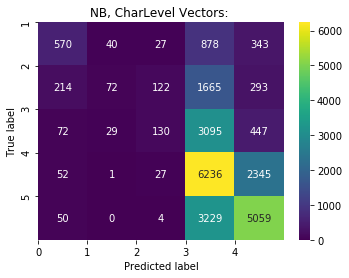

Accuracy of Naive Bayes, CharLevel Vectors Model is:  48.27%


In [19]:
# Naive Bayes on Count Vectors
accuracy_nb_cv = train_model("Naive Bayes  Count Vectors:",naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print( "Accuracy of Naive Bayes, Count Vectors Model is: ", "{:.2%}".format(accuracy_nb_cv))

# Naive Bayes on Word Level TF IDF Vectors
accuracy_nb_tfidf = train_model("NB, WordLevel TF-IDF: ",naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print( "Accuracy of Naive Bayes, WordLevel TF-IDF Model is: ", "{:.2%}".format(accuracy_nb_tfidf))

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy_nb_ngtfidf = train_model("NB, N-Gram Vectors: ",naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print( "Accuracy of Naive Bayes, N-Gram Vectors Model is: ", "{:.2%}".format(accuracy_nb_ngtfidf))


# Naive Bayes on Character Level TF IDF Vectors
accuracy_nb_ctfidf = train_model("NB, CharLevel Vectors: ",naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print( "Accuracy of Naive Bayes, CharLevel Vectors Model is: ", "{:.2%}".format(accuracy_nb_ctfidf))


Confusion matrix for LR, Count Vectors:  is:

[[1032  333  133  210  150]
 [ 461  634  627  473  171]
 [ 144  365 1159 1614  491]
 [  72  142  754 4844 2849]
 [  60   45  177 2430 5630]]

Classification report for LR, Count Vectors:  is:

              precision    recall  f1-score   support

           1       0.58      0.56      0.57      1858
           2       0.42      0.27      0.33      2366
           3       0.41      0.31      0.35      3773
           4       0.51      0.56      0.53      8661
           5       0.61      0.67      0.64      8342

    accuracy                           0.53     25000
   macro avg       0.50      0.47      0.48     25000
weighted avg       0.52      0.53      0.52     25000



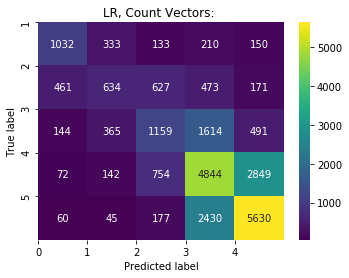

Accuracy of Liner Regression Count Vectors Model is:  53.20%

Confusion matrix for LR, WordLevel TF-IDF:  is:

[[1107  320  105  171  155]
 [ 433  621  622  490  200]
 [ 121  247 1180 1821  404]
 [  76   55  478 5316 2736]
 [  51   16   84 2290 5901]]

Classification report for LR, WordLevel TF-IDF:  is:

              precision    recall  f1-score   support

           1       0.62      0.60      0.61      1858
           2       0.49      0.26      0.34      2366
           3       0.48      0.31      0.38      3773
           4       0.53      0.61      0.57      8661
           5       0.63      0.71      0.67      8342

    accuracy                           0.56     25000
   macro avg       0.55      0.50      0.51     25000
weighted avg       0.56      0.56      0.55     25000



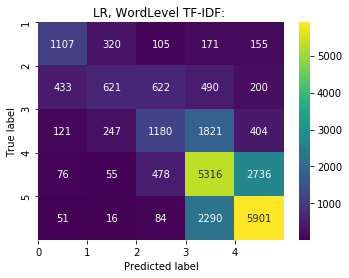

Accuracy of Liner Regression TFIDF Model is:  56.50%

Confusion matrix for LR, N-Gram Vectors:  is:

[[ 727  219  155  318  439]
 [ 299  528  485  660  394]
 [  98  198 1034 1761  682]
 [  77   69  466 5097 2952]
 [  79   36  117 2574 5536]]

Classification report for LR, N-Gram Vectors:  is:

              precision    recall  f1-score   support

           1       0.57      0.39      0.46      1858
           2       0.50      0.22      0.31      2366
           3       0.46      0.27      0.34      3773
           4       0.49      0.59      0.53      8661
           5       0.55      0.66      0.60      8342

    accuracy                           0.52     25000
   macro avg       0.51      0.43      0.45     25000
weighted avg       0.51      0.52      0.50     25000



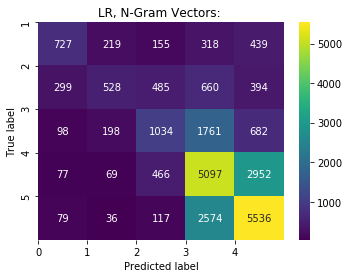

Accuracy of Liner Regression N-Gram Level Model is:  51.69%

Confusion matrix for LR, CharLevel TF-IDF:  is:

[[ 999  265  137  214  243]
 [ 381  571  556  603  255]
 [ 128  227 1081 1871  466]
 [  93   56  387 5352 2773]
 [  70   18   69 2365 5820]]

Classification report for LR, CharLevel TF-IDF:  is:

              precision    recall  f1-score   support

           1       0.60      0.54      0.57      1858
           2       0.50      0.24      0.33      2366
           3       0.48      0.29      0.36      3773
           4       0.51      0.62      0.56      8661
           5       0.61      0.70      0.65      8342

    accuracy                           0.55     25000
   macro avg       0.54      0.48      0.49     25000
weighted avg       0.55      0.55      0.54     25000



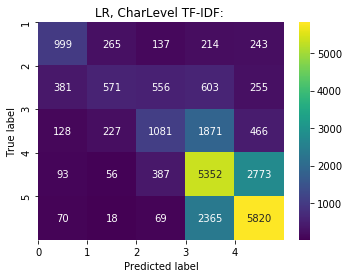

Accuracy of Liner Regression Char Level TFIDF Model is:  55.29%


In [20]:





# Linear Classifier on Count Vectors
accuracy_lr_cv = train_model("LR, Count Vectors: ",linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
print( "Accuracy of Liner Regression Count Vectors Model is: ", "{:.2%}".format(accuracy_lr_cv))

# Linear Classifier on Word Level TF IDF Vectors
accuracy_lr_tfidf = train_model("LR, WordLevel TF-IDF: ",linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print( "Accuracy of Liner Regression TFIDF Model is: ", "{:.2%}".format(accuracy_lr_tfidf))

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy_lr_ngtfidf = train_model("LR, N-Gram Vectors: ",linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print( "Accuracy of Liner Regression N-Gram Level Model is: ", "{:.2%}".format(accuracy_lr_ngtfidf))

# Linear Classifier on Character Level TF IDF Vectors
accuracy_lr_ctfidf = train_model("LR, CharLevel TF-IDF: ",linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print( "Accuracy of Liner Regression Char Level TFIDF Model is: ", "{:.2%}".format(accuracy_lr_ctfidf))





Confusion matrix for SVM, N-Gram Vectors:  is:

[[   0    0    0  920    0]
 [   0    0    0 1137    0]
 [   0    0    0 1891    0]
 [   0    0    0 4389    0]
 [   0    0    0 4163    0]]

Classification report for SVM, N-Gram Vectors:  is:

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       920
           2       0.00      0.00      0.00      1137
           3       0.00      0.00      0.00      1891
           4       0.35      1.00      0.52      4389
           5       0.00      0.00      0.00      4163

    accuracy                           0.35     12500
   macro avg       0.07      0.20      0.10     12500
weighted avg       0.12      0.35      0.18     12500



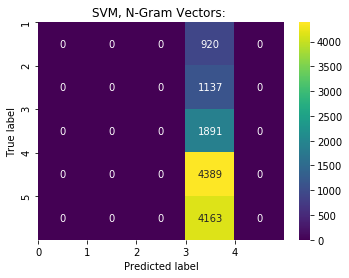

Accuracy of SVM, N-Gram Vectors Model is:  35.11%


In [18]:
# SVM on Ngram Level TF IDF Vectors
accuracy_svm_ngtfidf = train_model("SVM, N-Gram Vectors: ",svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print( "Accuracy of SVM, N-Gram Vectors Model is: ", "{:.2%}".format(accuracy_svm_ngtfidf))






Confusion matrix for RF, Count Vectors:  is:

[[ 245   95  131  264  185]
 [ 106  117  209  465  240]
 [  60  125  402  928  376]
 [  67  111  412 2323 1476]
 [  63   69  221 1655 2155]]

Classification report for RF, Count Vectors:  is:

              precision    recall  f1-score   support

           1       0.45      0.27      0.34       920
           2       0.23      0.10      0.14      1137
           3       0.29      0.21      0.25      1891
           4       0.41      0.53      0.46      4389
           5       0.49      0.52      0.50      4163

    accuracy                           0.42     12500
   macro avg       0.37      0.33      0.34     12500
weighted avg       0.40      0.42      0.40     12500



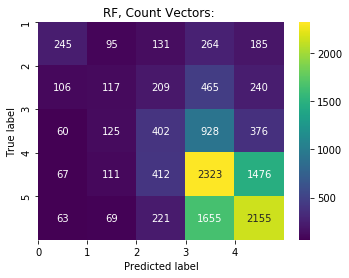

Accuracy of Random Forest Count Vector Model is:  41.94%


In [19]:
# RF on Count Vectors
accuracy_rf_cv = train_model("RF, Count Vectors: ",ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count)
print( "Accuracy of Random Forest Count Vector Model is: ", "{:.2%}".format(accuracy_rf_cv))




Confusion matrix for RF, WordLevel TF-IDF:  is:

[[ 313  107  110  216  174]
 [ 139  147  220  435  196]
 [  82  122  432  936  319]
 [  75   91  355 2378 1490]
 [  48   56  167 1612 2280]]

Classification report for RF, WordLevel TF-IDF:  is:

              precision    recall  f1-score   support

           1       0.48      0.34      0.40       920
           2       0.28      0.13      0.18      1137
           3       0.34      0.23      0.27      1891
           4       0.43      0.54      0.48      4389
           5       0.51      0.55      0.53      4163

    accuracy                           0.44     12500
   macro avg       0.41      0.36      0.37     12500
weighted avg       0.43      0.44      0.43     12500



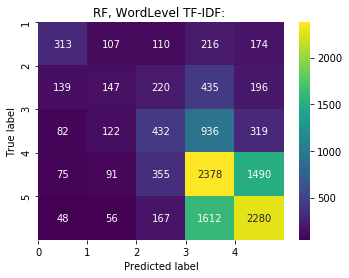

Accuracy of Random Forest word level Model is:  44.40%


In [20]:
# RF on Word Level TF IDF Vectors
accuracy_rf_tfidf = train_model("RF, WordLevel TF-IDF: ",ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print( "Accuracy of Random Forest word level Model is: ", "{:.2%}".format(accuracy_rf_tfidf))





Confusion matrix for Xgb, Count Vectors:  is:

[[ 269   72   61  238  280]
 [  95  120  125  543  254]
 [  26   56  294 1147  368]
 [  14   13  106 2551 1705]
 [  10    5   15 1262 2871]]

Classification report for Xgb, Count Vectors:  is:

              precision    recall  f1-score   support

           1       0.65      0.29      0.40       920
           2       0.45      0.11      0.17      1137
           3       0.49      0.16      0.24      1891
           4       0.44      0.58      0.50      4389
           5       0.52      0.69      0.60      4163

    accuracy                           0.49     12500
   macro avg       0.51      0.36      0.38     12500
weighted avg       0.49      0.49      0.46     12500



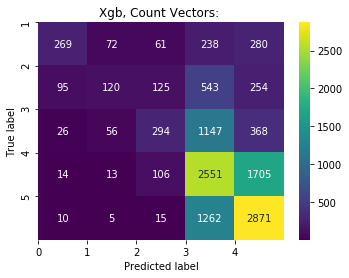

Accuracy of Xgradient boost count vector Model is:  48.84%


In [21]:
# Extereme Gradient Boosting on Count Vectors
accuracy_xgb_cv = train_model("Xgb, Count Vectors: ",xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y, xvalid_count.tocsc())
print( "Accuracy of Xgradient boost count vector Model is: ", "{:.2%}".format(accuracy_xgb_cv))




Confusion matrix for Xgb, WordLevel TF-IDF:  is:

[[ 277   75   55  228  285]
 [  95  122  156  514  250]
 [  34   53  318 1137  349]
 [  16    9  105 2586 1673]
 [   9    2   18 1278 2856]]

Classification report for Xgb, WordLevel TF-IDF:  is:

              precision    recall  f1-score   support

           1       0.64      0.30      0.41       920
           2       0.47      0.11      0.17      1137
           3       0.49      0.17      0.25      1891
           4       0.45      0.59      0.51      4389
           5       0.53      0.69      0.60      4163

    accuracy                           0.49     12500
   macro avg       0.52      0.37      0.39     12500
weighted avg       0.50      0.49      0.46     12500



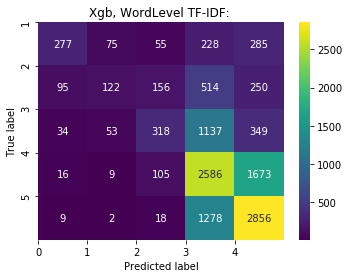

Accuracy of Xgradient boost TFIDF vector Model is:  49.27%


In [22]:
# Extereme Gradient Boosting on Word Level TF IDF Vectors
accuracy_xgb_tfidf = train_model("Xgb, WordLevel TF-IDF: ",xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y, xvalid_tfidf.tocsc())
print( "Accuracy of Xgradient boost TFIDF vector Model is: ", "{:.2%}".format(accuracy_xgb_tfidf))






Confusion matrix for Xgb, CharLevel Vectors:  is:

[[ 278   61   54  251  276]
 [ 113  121  157  523  223]
 [  37   60  358 1093  343]
 [  19   10  145 2570 1645]
 [  13    5   32 1284 2829]]

Classification report for Xgb, CharLevel Vectors:  is:

              precision    recall  f1-score   support

           1       0.60      0.30      0.40       920
           2       0.47      0.11      0.17      1137
           3       0.48      0.19      0.27      1891
           4       0.45      0.59      0.51      4389
           5       0.53      0.68      0.60      4163

    accuracy                           0.49     12500
   macro avg       0.51      0.37      0.39     12500
weighted avg       0.49      0.49      0.46     12500



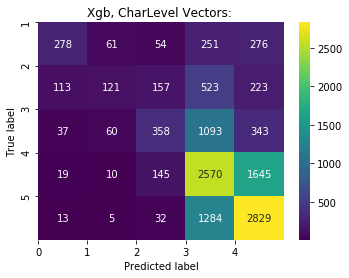

Accuracy of Xgradient boost char level vector Model is: 49.25%


In [23]:
# Extereme Gradient Boosting on Character Level TF IDF Vectors
accuracy_xgb_cltfidf = train_model("Xgb, CharLevel Vectors: ",xgboost.XGBClassifier(), xtrain_tfidf_ngram_chars.tocsc(), train_y, xvalid_tfidf_ngram_chars.tocsc())
print( "Accuracy of Xgradient boost char level vector Model is:", "{:.2%}".format(accuracy_xgb_cltfidf))






In [37]:


train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df_merge3['txt_stemmed_sentence'], df_merge3['stars_x'])


# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)



# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(df_merge3['txt_stemmed_sentence'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x).toarray()
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x).toarray()


from keras.models import Sequential
from keras import layers

input_dim = xtrain_tfidf_ngram.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(5, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
model.summary()



history = model.fit(xtrain_tfidf_ngram, train_y, epochs=100, verbose=False, validation_data=(xvalid_tfidf_ngram, valid_y)  ,batch_size=10)

loss, accuracy = model.evaluate(xtrain_tfidf_ngram, train_y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(xvalid_tfidf_ngram, valid_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 10)                50010     
_________________________________________________________________
dense_27 (Dense)             (None, 5)                 55        
Total params: 50,065
Trainable params: 50,065
Non-trainable params: 0
_________________________________________________________________
Training Accuracy: 0.8440
Testing Accuracy:  0.4385


(37500, 69182)
(12500, 69182)
(37500,)
(12500,)
1172/1172 [==============================] - 27s 23ms/step - loss: 4.0633

Confusion matrix for Neural Network Ngram Level TF IDF Vector Model is:

[[  14   13   23   33  833]
 [  15   11    7   20 1105]
 [  15   15   13   26 1819]
 [  29   23   33   61 4184]
 [  38   54   41   59 4016]]

Classification report for Neural Network Ngram Level TF IDF Vector Model is:

              precision    recall  f1-score   support

           1       0.13      0.02      0.03       916
           2       0.09      0.01      0.02      1158
           3       0.11      0.01      0.01      1888
           4       0.31      0.01      0.03      4330
           5       0.34      0.95      0.50      4208

    accuracy                           0.33     12500
   macro avg       0.19      0.20      0.12     12500
weighted avg       0.25      0.33      0.18     12500



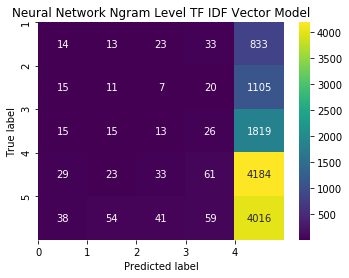

Accuracy of Neural Network Ngram Level TF IDF Vector Model is: 32.92%


In [35]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df_merge3['txt_stemmed_sentence'], df_merge3['stars_x'])


from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(df_merge3['txt_stemmed_sentence'])

X_train = vectorizer.transform(train_x)
X_test  = vectorizer.transform(valid_x)




# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

print(X_train.shape)
print(X_test.shape)
print(train_y.shape)
print(valid_y.shape)




def create_model_architecture(input_size):
    # create input layer 
    input_layer = layers.Input((input_size, ), sparse=True)
    
    # create hidden layer
    hidden_layer = layers.Dense(100, activation="relu")(input_layer)
    
    # create output layer
    output_layer = layers.Dense(5, activation="softmax")(hidden_layer)

    classifier = models.Model(inputs = input_layer, outputs = output_layer)
    classifier.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    return classifier 

classifier = create_model_architecture(X_train.shape[1])
accuracy_neural_network = train_model("Neural Network Ngram Level TF IDF Vector Model",classifier, X_train, train_y, X_test, is_neural_net=True)
print( "Accuracy of Neural Network Ngram Level TF IDF Vector Model is:", "{:.2%}".format(accuracy_neural_network))



(37500, 69182)
(12500, 69182)
(37500,)
(12500,)
1172/1172 [==============================] - 1s 712us/step - loss: 1.3172

Confusion matrix for Neural Network Ngram Level TF IDF Vector Model is:

[[  53  257   89  304  271]
 [  10  222  222  532  188]
 [   2   75  278 1232  356]
 [   1   19   85 2685 1489]
 [   4   18   17 1291 2800]]

Classification report for Neural Network Ngram Level TF IDF Vector Model is:

              precision    recall  f1-score   support

           1       0.76      0.05      0.10       974
           2       0.38      0.19      0.25      1174
           3       0.40      0.14      0.21      1943
           4       0.44      0.63      0.52      4279
           5       0.55      0.68      0.61      4130

    accuracy                           0.48     12500
   macro avg       0.51      0.34      0.34     12500
weighted avg       0.49      0.48      0.44     12500



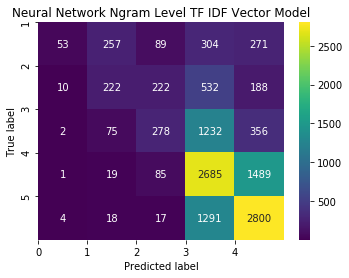

Accuracy of Neural Network Ngram Level TF IDF Vector Model is: 48.30%


In [39]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df_merge3['txt_stemmed_sentence'], df_merge3['stars_x'])


# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)



# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(df_merge3['txt_stemmed_sentence'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x).toarray()
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x).toarray()


from keras.models import Sequential
from keras import layers



print(X_train.shape)
print(X_test.shape)
print(train_y.shape)
print(valid_y.shape)



def create_model_architecture(input_size):
    # create input layer 
    input_layer = layers.Input((input_size, ), sparse=True)
    
    # create hidden layer
    hidden_layer = layers.Dense(10, activation="relu")(input_layer)
    
    # create output layer
    output_layer = layers.Dense(5, activation="softmax")(hidden_layer)

    classifier = models.Model(inputs = input_layer, outputs = output_layer)
    classifier.compile(optimizer=optimizers.Adam(), loss='sparse_categorical_crossentropy')
    return classifier 

classifier = create_model_architecture(xtrain_tfidf_ngram.shape[1])
accuracy_neural_network_ngram = train_model("Neural Network Ngram Level TF IDF Vector Model",classifier, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, is_neural_net=True)
print( "Accuracy of Neural Network Ngram Level TF IDF Vector Model is:", "{:.2%}".format(accuracy_neural_network_ngram))




Confusion Matrix for word2vec xgboost model:

[[   2    0    0  756  383]
 [   0    0    0  892  456]
 [   0    0    0 1644  716]
 [   1    0    0 3091 2027]
 [   1    0    0 2363 2668]]
Accuracy of XGBoost word2vec model classifier is: 38.41%


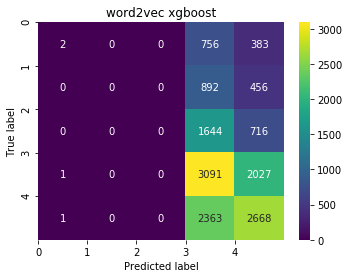


 Classification report for word2vec xgboost model:

              precision    recall  f1-score   support

           1       0.50      0.00      0.00      1141
           2       0.00      0.00      0.00      1348
           3       0.00      0.00      0.00      2360
           4       0.35      0.60      0.45      5119
           5       0.43      0.53      0.47      5032

    accuracy                           0.38     15000
   macro avg       0.26      0.23      0.18     15000
weighted avg       0.30      0.38      0.31     15000



In [44]:
#################### Word2vec word embedding using xgboost classifier #############################3

test_size = 0.3
random_state = 1234

X_train, X_test, y_train, y_test = model_selection.train_test_split(df_merge3['txt_stemmed_sentence'], df_merge3['stars_x'], test_size=test_size, random_state=random_state)
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from gensim.models import Word2Vec


class GensimWord2VecVectorizer(BaseEstimator, TransformerMixin):
    """
    Word vectors are averaged across to create the document-level vectors/features.
    gensim's own gensim.sklearn_api.W2VTransformer doesn't support out of vocabulary words,
    hence we roll out our own.
    All the parameters are gensim.models.Word2Vec's parameters.
    https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec
    """

    def __init__(self, size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None,
                 sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5,
                 ns_exponent=0.75, cbow_mean=1, hashfxn=hash, iter=5, null_word=0,
                 trim_rule=None, sorted_vocab=1, batch_words=10000, compute_loss=False,
                 callbacks=(), max_final_vocab=None):
        self.size = size
        self.alpha = alpha
        self.window = window
        self.min_count = min_count
        self.max_vocab_size = max_vocab_size
        self.sample = sample
        self.seed = seed
        self.workers = workers
        self.min_alpha = min_alpha
        self.sg = sg
        self.hs = hs
        self.negative = negative
        self.ns_exponent = ns_exponent
        self.cbow_mean = cbow_mean
        self.hashfxn = hashfxn
        self.iter = iter
        self.null_word = null_word
        self.trim_rule = trim_rule
        self.sorted_vocab = sorted_vocab
        self.batch_words = batch_words
        self.compute_loss = compute_loss
        self.callbacks = callbacks
        self.max_final_vocab = max_final_vocab

    def fit(self, X, y=None):
        self.model_ = Word2Vec(
            sentences=X, corpus_file=None,
            size=self.size, alpha=self.alpha, window=self.window, min_count=self.min_count,
            max_vocab_size=self.max_vocab_size, sample=self.sample, seed=self.seed,
            workers=self.workers, min_alpha=self.min_alpha, sg=self.sg, hs=self.hs,
            negative=self.negative, ns_exponent=self.ns_exponent, cbow_mean=self.cbow_mean,
            hashfxn=self.hashfxn, iter=self.iter, null_word=self.null_word,
            trim_rule=self.trim_rule, sorted_vocab=self.sorted_vocab, batch_words=self.batch_words,
            compute_loss=self.compute_loss, callbacks=self.callbacks,
            max_final_vocab=self.max_final_vocab)
        return self

    def transform(self, X):
        X_embeddings = np.array([self._get_embedding(words) for words in X])
        return X_embeddings

    def _get_embedding(self, words):
        valid_words = [word for word in words if word in self.model_.wv.vocab]
        if valid_words:
            embedding = np.zeros((len(valid_words), self.size), dtype=np.float32)
            for idx, word in enumerate(valid_words):
                embedding[idx] = self.model_.wv[word]

            return np.mean(embedding, axis=0)
        else:
            return np.zeros(self.size)




gensim_word2vec_tr = GensimWord2VecVectorizer(size=50, min_count=3, sg=1, alpha=0.025, iter=10)
xgb = xgboost.XGBClassifier(learning_rate=0.01, n_estimators=100, n_jobs=-1)
w2v_xgb = Pipeline([('w2v', gensim_word2vec_tr),  ('xgb', xgb)])
#w2v_xgb

w2v_xgb.fit(X_train, y_train)




y_train_pred = w2v_xgb.predict(X_train)
print('\nConfusion Matrix for word2vec xgboost model:\n')
y_test_pred = w2v_xgb.predict(X_test)
print(confusion_matrix(y_test, y_test_pred))
accuracy_w2v_xgb=metrics.accuracy_score(y_test, y_test_pred)
print( "Accuracy of XGBoost word2vec model classifier is:", "{:.2%}".format(metrics.accuracy_score(y_test, y_test_pred)))
cf_matrix=confusion_matrix(y_test, y_test_pred)
index = ['0','1','2','3','4']  
columns = ['0','1','2','3','4']  
cm_df = pd.DataFrame(cf_matrix,columns,index)                      
plt.figure(figsize=(5.5,4))  
sns.heatmap(cm_df, annot=True,cmap="viridis" ,fmt='g')
plt.xticks([0,1,2,3,4])
plt.yticks([0,1,2,3,4])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("word2vec xgboost")
plt.show()

print('\n Classification report for word2vec xgboost model:\n')
print(classification_report(y_test, y_test_pred,target_names=['1','2','3','4','5' ]))




 Multiclass ROC Curve for Naive Bayes Classifier 

AUC for Class 1: 0.857274061205751
AUC for Class 2: 0.7469341678064164
AUC for Class 3: 0.7025143189626548
AUC for Class 4: 0.6697238429213672
AUC for Class 5: 0.777215664481072


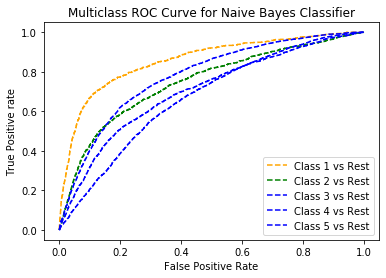


 Multiclass ROC Curve for Linear Regression classifier 

AUC for Class 1: 0.9115248794062333
AUC for Class 2: 0.808149981612878
AUC for Class 3: 0.7325261115582609
AUC for Class 4: 0.6844827056833233
AUC for Class 5: 0.8036822386692285


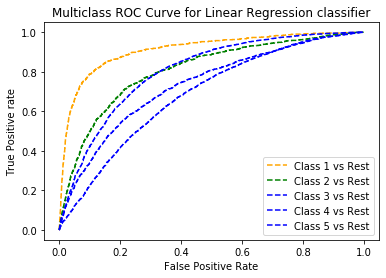


 Multiclass ROC curve for Random Foreset Classifier  

AUC for Class 1: 0.7665607144464763
AUC for Class 2: 0.659734461937398
AUC for Class 3: 0.6210340460235904
AUC for Class 4: 0.5956354856607776
AUC for Class 5: 0.7077988247761994


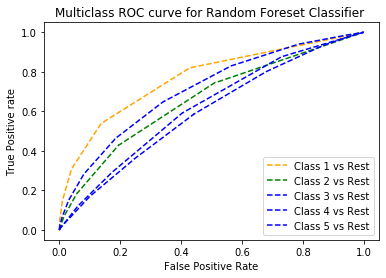

In [27]:
# Function to Plot ROC curve for multi-class classification using different models


def plot_roc(model_name,clf,xtrain_count,y_train,xvalid_count,y_test):
            #clf = MultinomialNB(alpha=.01)
    clf.fit(xtrain_count, y_train)
    pred = clf.predict(xvalid_count)
    pred_prob = clf.predict_proba(xvalid_count)
    print('\n',model_name,'\n')
            # roc curve for classes
    fpr = {}
    tpr = {}
    thresh ={}

    n_class = 5
    for i in range(n_class):    
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
        print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))
              # plotting    
    plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 1 vs Rest')
    plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 2 vs Rest')
    plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 3 vs Rest')
    plt.plot(fpr[3], tpr[3], linestyle='--',color='blue', label='Class 4 vs Rest')
    plt.plot(fpr[4], tpr[4], linestyle='--',color='blue', label='Class 5 vs Rest')
    plt.title(model_name)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best') 
    plt.show()
    
    

#################  Plot ROC Curve for  4 different models ######################################
plot_roc("Multiclass ROC Curve for Naive Bayes Classifier",MultinomialNB(alpha=.01),xtrain_count,train_y,xvalid_count,valid_y)
plot_roc("Multiclass ROC Curve for Linear Regression classifier",OneVsRestClassifier(LogisticRegression()),xtrain_count,train_y,xvalid_count,valid_y)
#plot_roc("Multiclass ROC curve for SVM classifier",OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,random_state=0)),xtrain_tfidf_ngram,train_y,xvalid_tfidf_ngram,valid_y)
plot_roc("Multiclass ROC curve for Random Foreset Classifier ",RandomForestClassifier(random_state=123),xtrain_count,train_y,xvalid_count,valid_y)




